In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
from sklearn.naive_bayes import GaussianNB

In [6]:
data = pd.read_csv('C:/Users/KIIT/Desktop/ML/data.csv')
print('Dataset :',data.shape)
x = data.iloc[:, [0, 1, 2, 3, 4]].values #first five columns are selected and values are stored in a numpy array.
data.info()
data[0:10]#prints only the rows from 0-10 i.e the first 10 rows

Dataset : (569, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


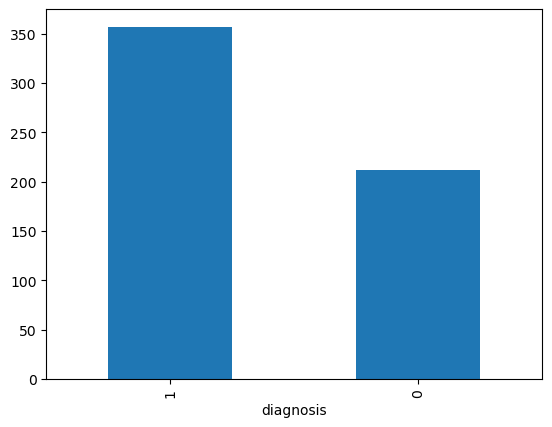

In [8]:
data.diagnosis.value_counts().plot(kind='bar') #counts occurence of diagnosis value i.e either 1 or 0 
plt.show()

<Axes: >

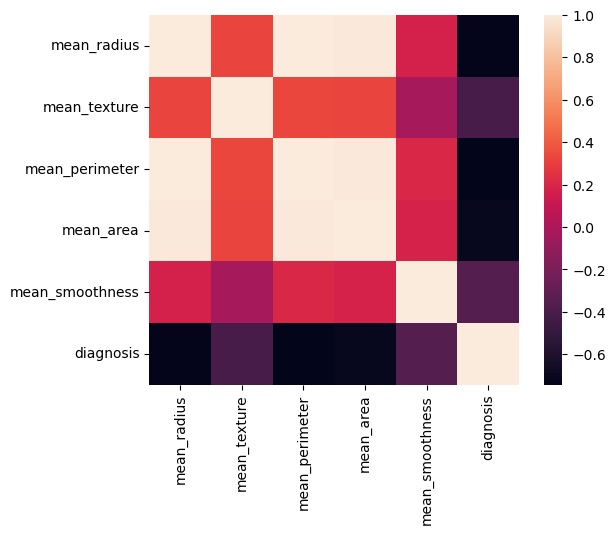

In [7]:
data = data[['mean_radius','mean_texture','mean_perimeter','mean_area', 'mean_smoothness','diagnosis']] #Subsetting the data
cor = data.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot cor as a heat map

C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


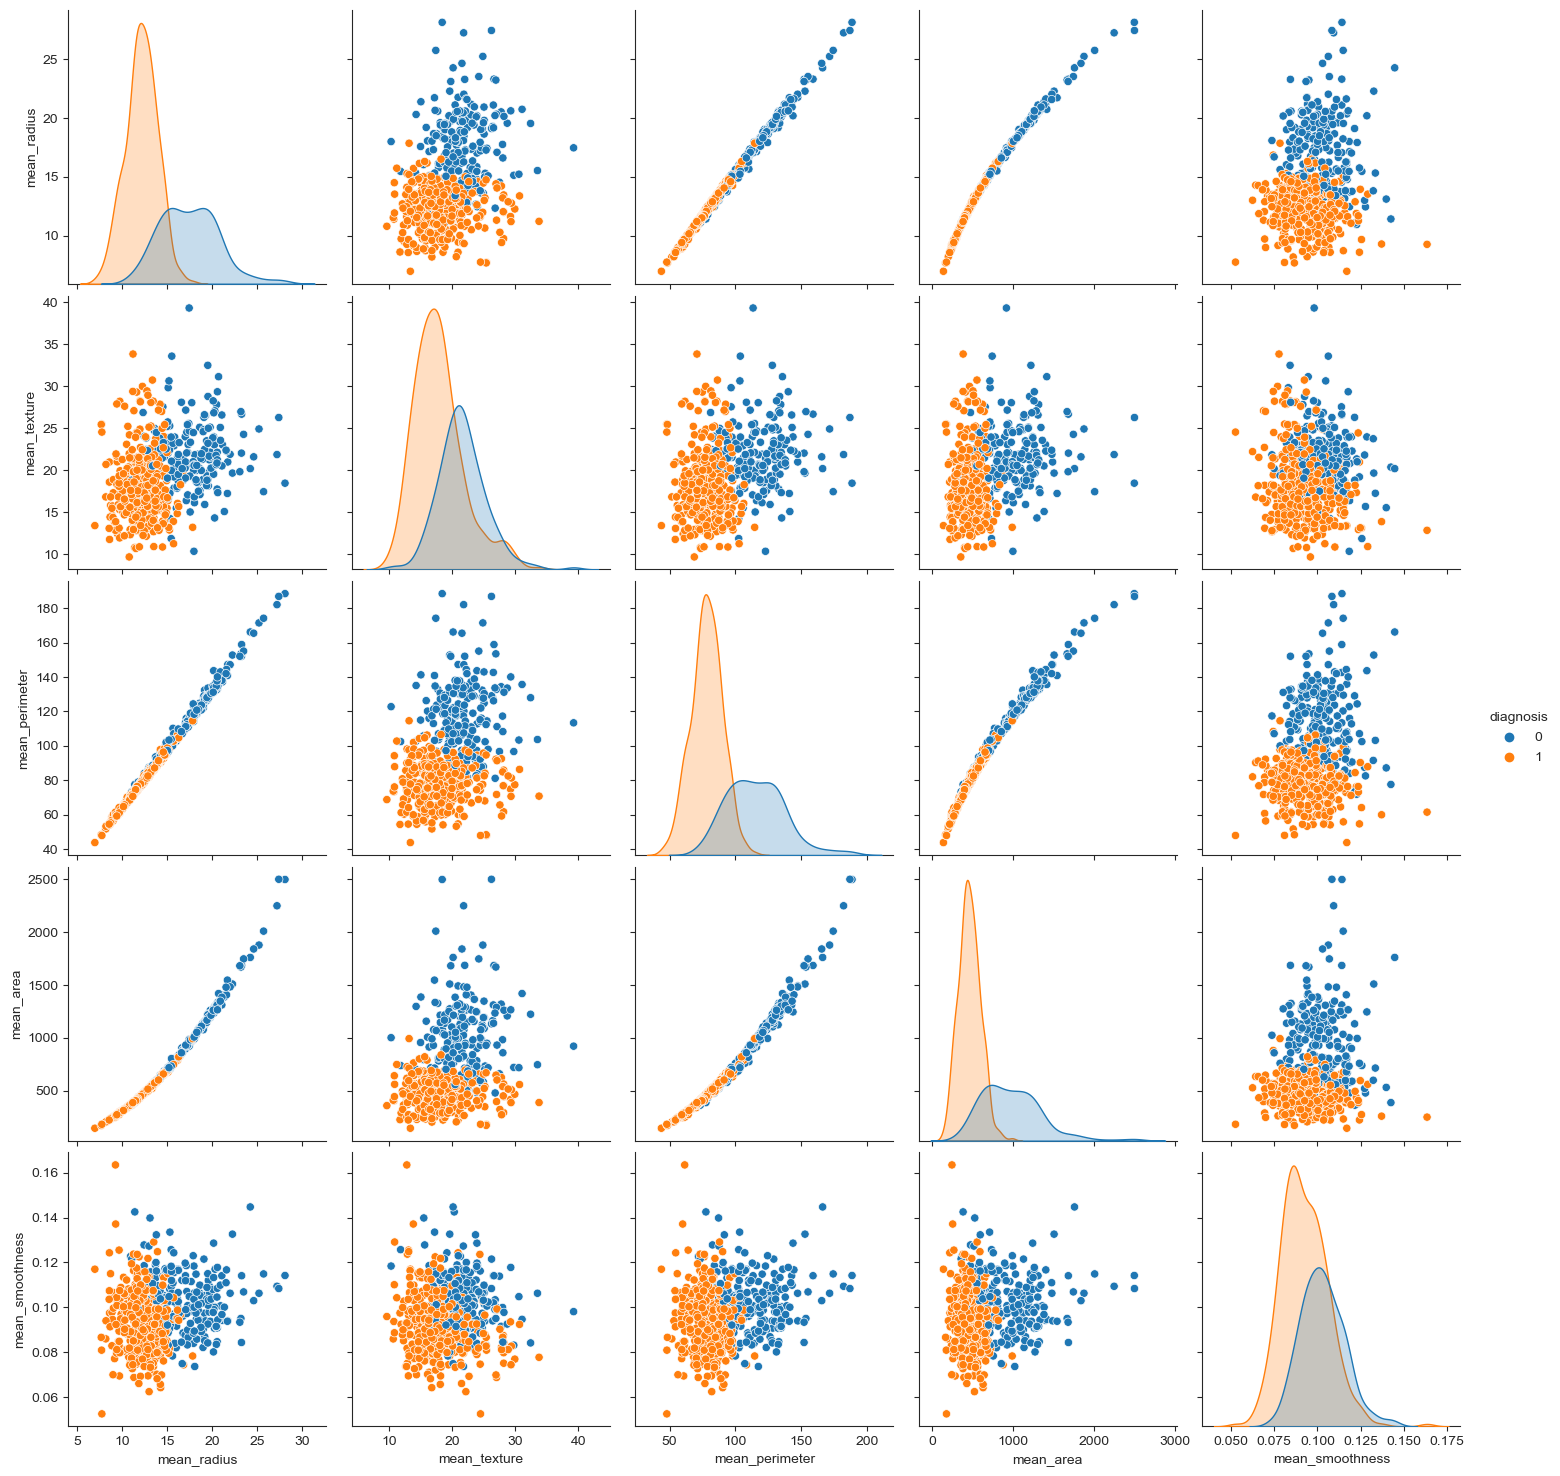

In [5]:
sns.set_style("ticks")
sns.pairplot(data,hue="diagnosis",size=3);
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
Y = data['diagnosis']
X = data.drop(columns=['diagnosis'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

In [7]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (455, 5)
Y train shape:  (455,)
X test shape:  (114, 5)
Y test shape:  (114,)


# Logistical Regression

In [8]:
from sklearn.linear_model import LogisticRegression

#defining the model
logreg = LogisticRegression(C=10)

#train the model
logreg.fit(X_train, Y_train)

#predict target values
Y_predict1 = logreg.predict(X_test)

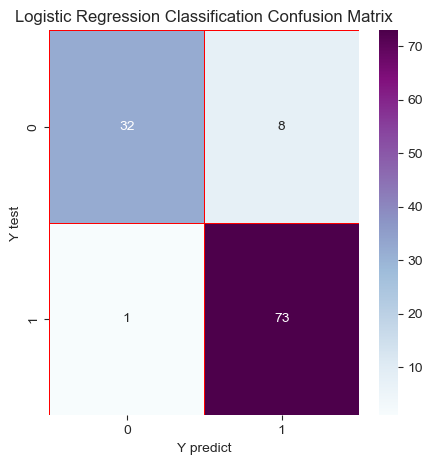

In [9]:
# The confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

logreg_cm = confusion_matrix(Y_test, Y_predict1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [10]:
# Test score
score_logreg = logreg.score(X_test, Y_test)
print(score_logreg)

0.9210526315789473


In [11]:
#precision and recall
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_test, Y_predict1)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.90


## ROC Curve 

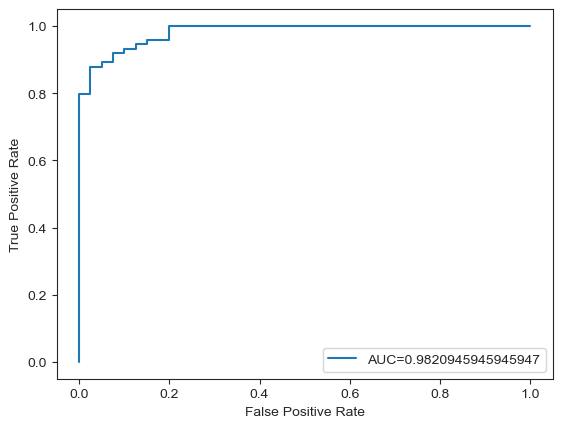

In [12]:
Y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# K Nearest Neighbour

In [13]:
from sklearn.neighbors import KNeighborsClassifier

#defining the model
knncla = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

#train model
knncla.fit(X_train, Y_train)

#predict target values
Y_predict6 = knncla.predict(X_test)

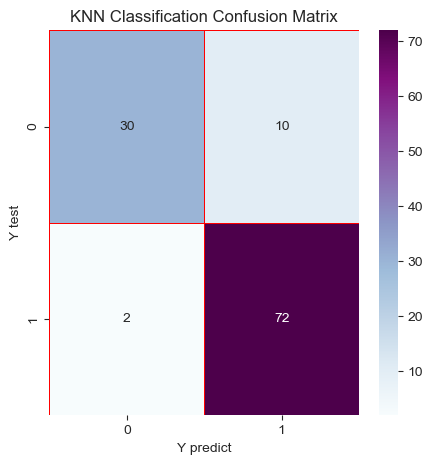

In [14]:
# The confusion matrix
knncla_cm = confusion_matrix(Y_test, Y_predict6)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knncla_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [15]:
# Test score
score_knncla= knncla.score(X_test, Y_test)
print(score_knncla)

0.8947368421052632


In [17]:
#precision and recall
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_test, Y_predict6)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.87


## ROC Curve 

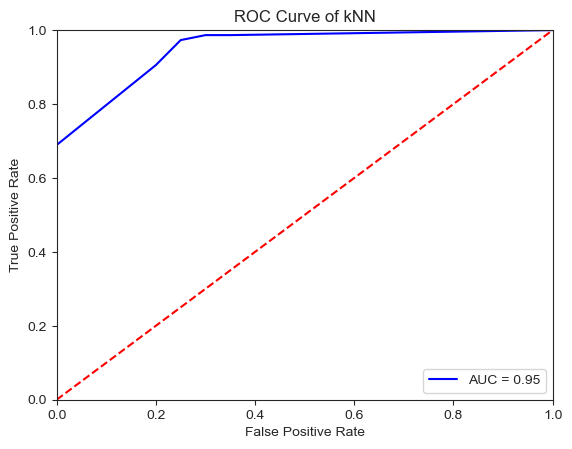

In [20]:
Y_scores = knncla.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(Y_test, Y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

# Naive Bayes Classification


In [21]:
#define the model
nbcla = GaussianNB()

#train model
nbcla.fit(X_train, Y_train)

#predict target values
Y_predict3 = nbcla.predict(X_test)

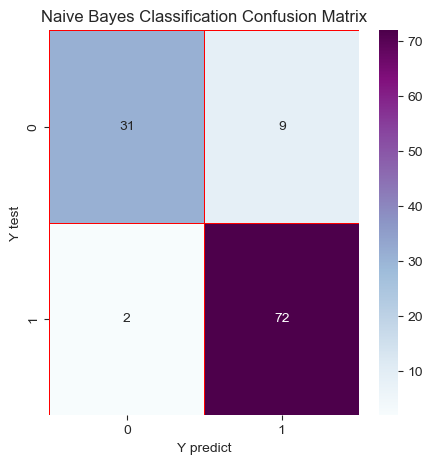

In [22]:
# The confusion matrix
nbcla_cm = confusion_matrix(Y_test, Y_predict3)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nbcla_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('Naive Bayes Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [23]:
# Test score
score_nbcla = nbcla.score(X_test, Y_test)
print(score_nbcla)

0.9035087719298246


In [24]:
#precision and recall
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_test, Y_predict3)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.88


## ROC Curve 

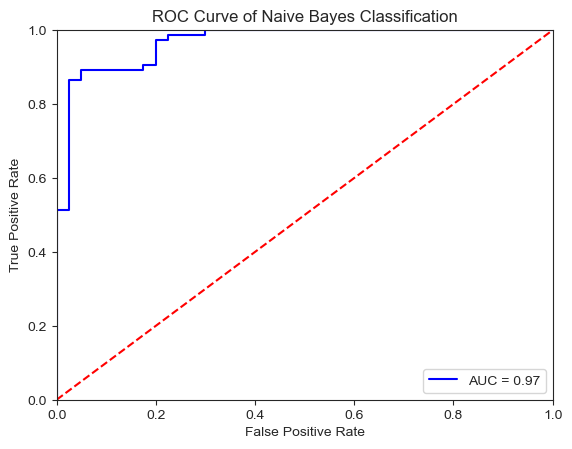

In [25]:
Y_scores = nbcla.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(Y_test, Y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Naive Bayes Classification')
plt.show()

# ROC Curve Comparison

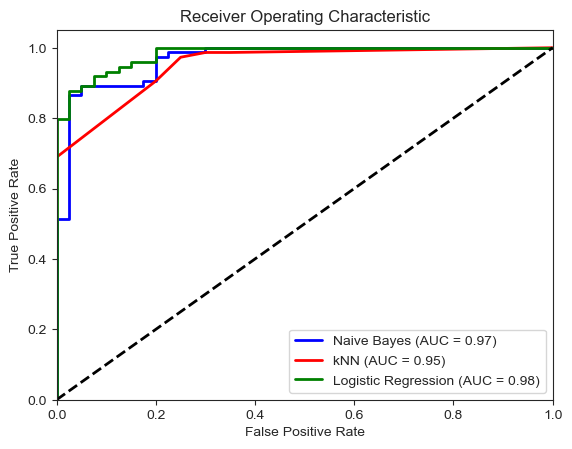

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Naive Bayes
Y_scores_nb = nbcla.predict_proba(X_test)
fpr_nb, tpr_nb, _ = roc_curve(Y_test, Y_scores_nb[:, 1])
roc_auc_nb = auc(fpr_nb, tpr_nb)

# kNN
Y_scores_knn = knncla.predict_proba(X_test)
fpr_knn, tpr_knn, _ = roc_curve(Y_test, Y_scores_knn[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Logistic Regression
Y_pred_proba_logreg = logreg.predict_proba(X_test)[:, 1]
fpr_logreg, tpr_logreg, _ = roc_curve(Y_test, Y_pred_proba_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Plotting all ROC curves
plt.figure()
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, label='kNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fpr_logreg, tpr_logreg, color='green', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logreg)

# Plotting the 50% line
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')

# Setting labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
